## General Setup

In [2]:
import h5py
import numpy as np

with h5py.File(r"D:\Salome\Slp_cross_model\results\labels.v001.cross.006_Trial     3.analysis.h5", "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print("D:\train_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5")
print()



print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
D:	rain_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(15044, 4, 2, 1)

===nodes===
0: center
1: front
2: left
3: right



In [3]:
CENTER_INDEX = 0
center_loc = locations[:, CENTER_INDEX, :, :]

### Find center and radius of circle

In [75]:
# take three points on circle, are on circle, checked by plotting  

x_1 = float(locations[100,1,0,0])
y_1 = float(1200-locations[100,1,1,0])

x_2 = float(locations[500,1,0,0])
y_2 = float(1200-locations[500,1,1,0])

x_3 = float(locations[1000,1,0,0])
y_3 = float(1200-locations[1000,1,1,0])



print (x_1, y_1, x_2, y_2, x_3, y_3)

233.9093780517578 911.9408569335938 436.3338928222656 256.0670166015625 1095.9609375 728.2630310058594


In [76]:
#find center and radius of circle 

from math import sqrt

# Function to find the circle on 
# which the given three points lie 
def findCircle(x1, y1, x2, y2, x3, y3) :
	x12 = x1 - x2; 
	x13 = x1 - x3; 

	y12 = y1 - y2; 
	y13 = y1 - y3; 

	y31 = y3 - y1; 
	y21 = y2 - y1; 

	x31 = x3 - x1; 
	x21 = x2 - x1; 

	# x1^2 - x3^2 
	sx13 = pow(x1, 2) - pow(x3, 2); 

	# y1^2 - y3^2 
	sy13 = pow(y1, 2) - pow(y3, 2); 

	sx21 = pow(x2, 2) - pow(x1, 2); 
	sy21 = pow(y2, 2) - pow(y1, 2); 

	f = (((sx13) * (x12) + (sy13) *
		(x12) + (sx21) * (x13) +
		(sy21) * (x13)) // (2 *
		((y31) * (x12) - (y21) * (x13))));
			
	g = (((sx13) * (y12) + (sy13) * (y12) +
		(sx21) * (y13) + (sy21) * (y13)) //
		(2 * ((x31) * (y12) - (x21) * (y13)))); 

	c = (-pow(x1, 2) - pow(y1, 2) -
		2 * g * x1 - 2 * f * y1); 

	# eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0 
	# where centre is (h = -g, k = -f) and 
	# radius r as r^2 = h^2 + k^2 - c 
	h = -g; 
	k = -f; 
	sqr_of_r = h * h + k * k - c; 

	# r is the radius 
	r = round(sqrt(sqr_of_r), 5); 

	print("Centre = (", h, ", ", k, ")"); 
	print("Radius = ", r); 


# Driver code 
if __name__ == "__main__" : 
	
	x1 = x_1 ; y1 = y_1; 
	x2 = x_2 ; y2 = y_2; 
	x3 = x_3 ; y3 = y_3; 
	findCircle(x1, y1, x2, y2, x3, y3); 


Centre = ( 635.0 ,  677.0 )
Radius =  464.83426


In [4]:
center_x = 634.0 
center_y = 677.0
radius = 464.83426

### Costruction and rotation of lines

In [85]:
#calculate three lines to separate the circle into six sectors

import math

# Circle parameters from above 

# Number of lines to divide the circle
num_lines = 3

# Calculate the angle between each line
angle_increment = 2 * math.pi / num_lines

# Calculate the equations of the lines
for i in range(num_lines):
    # Calculate the angle of the line
    angle = i * angle_increment

    # Calculate the slope of the line
    if math.cos(angle) != 0:
        slope = -math.sin(angle) / math.cos(angle)
    else:
        slope = float('inf')  # Vertical line

    # Calculate the y-intercept of the line
    y_intercept = center_y - slope * center_x

    # Print the equation of the line
    print(f"Line {i + 1}: y = {slope:.2f}x + {y_intercept:.2f}")


Line 1: y = -0.00x + 677.00
Line 2: y = 1.73x + -421.12
Line 3: y = -1.73x + 1775.12


In [86]:
#original line equations 

y1 = -0.00 * x + 677.00
a1 = 0 
b1 = 677.00

y2 = 1.73 * x + -421.12
a2 = 1.73
b2 = -421.12

y3 = -1.73 * x + 1775.12
a3 = -1.73
b3 = 1775.12

In [87]:
#calculate rotated line equations 
#rotated bzy 30 degress around center 


import math


# Point of rotation (x, y)
rotation_point = (center_x, center_y)

# Angle of rotation in degrees
angle_degrees = 30


# Original line equation parameters
a = a2  # Example slope
b = b2  # Example y-intercept

angle_degrees = 30


# Point of rotation (x, # Convert angle to radians
angle_radians = math.radians(angle_degrees)

# Define a function to rotate a point (x, y) around another point (ox, oy) by a given angle
def rotate_point(x, y, ox, oy, angle):
    new_x = ox + (x - ox) * math.cos(angle) - (y - oy) * math.sin(angle)
    new_y = oy + (x - ox) * math.sin(angle) + (y - oy) * math.cos(angle)
    return new_x, new_y


# Original line equation parameters
a = a1  # Example slope
b = b1  # Example y-intercept

# Calculate the coordinates of two points on the original line
x1 = 0  # Choose a point on the original line
y1 = a * x1 + b
x2 = 1  # Choose another point on the original line
y2 = a * x2 + b

# Rotate both points around the specified point of rotation
new_x1, new_y1 = rotate_point(x1, y1, rotation_point[0], rotation_point[1], angle_radians)
new_x2, new_y2 = rotate_point(x2, y2, rotation_point[0], rotation_point[1], angle_radians)

# Calculate the new slope and y-intercept of the rotated line
new_a = (new_y2 - new_y1) / (new_x2 - new_x1)
new_b = new_y1 - new_a * new_x1

print(f"Original line equation: y1 = {a}x + {b}")
print(f"Rotated line equation: y1 = {new_a}x + {new_b} (rotated around {rotation_point})")




# Original line equation parameters
a = a2  # Example slope
b = b2  # Example y-intercept

# Calculate the coordinates of two points on the original line
x1 = 0  # Choose a point on the original line
y1 = a * x1 + b
x2 = 1  # Choose another point on the original line
y2 = a * x2 + b

# Rotate both points around the specified point of rotation
new_x1, new_y1 = rotate_point(x1, y1, rotation_point[0], rotation_point[1], angle_radians)
new_x2, new_y2 = rotate_point(x2, y2, rotation_point[0], rotation_point[1], angle_radians)

# Calculate the new slope and y-intercept of the rotated line
new_a = (new_y2 - new_y1) / (new_x2 - new_x1)
new_b = new_y1 - new_a * new_x1

print(f"Original line equation: y2 = {a}x + {b}")
print(f"Rotated line equation: y2 = {new_a}x + {new_b} (rotated around {rotation_point})")



# Original line equation parameters
a = a3  # Example slope
b = b3  # Example y-intercept

# Calculate the coordinates of two points on the original line
x1 = 0  # Choose a point on the original line
y1 = a * x1 + b
x2 = 1  # Choose another point on the original line
y2 = a * x2 + b

# Rotate both points around the specified point of rotation
new_x1, new_y1 = rotate_point(x1, y1, rotation_point[0], rotation_point[1], angle_radians)
new_x2, new_y2 = rotate_point(x2, y2, rotation_point[0], rotation_point[1], angle_radians)

# Calculate the new slope and y-intercept of the rotated line
new_a = (new_y2 - new_y1) / (new_x2 - new_x1)
new_b = new_y1 - new_a * new_x1

print(f"Original line equation: y3 = {a}x + {b}")
print(f"Rotated line equation: y3 = {new_a}x + {new_b} (rotated around {rotation_point})")

Original line equation: y1 = 0x + 677.0
Rotated line equation: y1 = 0.5773502691896384x + 310.9599293337763 (rotated around (634.0, 677.0))
Original line equation: y1 = 1.73x + -421.12
Rotated line equation: y1 = 1948.7191084394267x + -1236078.708004072 (rotated around (634.0, 677.0))
Original line equation: y1 = -1.73x + 1775.12
Rotated line equation: y1 = -0.5766662617226573x + 1043.3574098868085 (rotated around (634.0, 677.0))


### Plot of data and lines

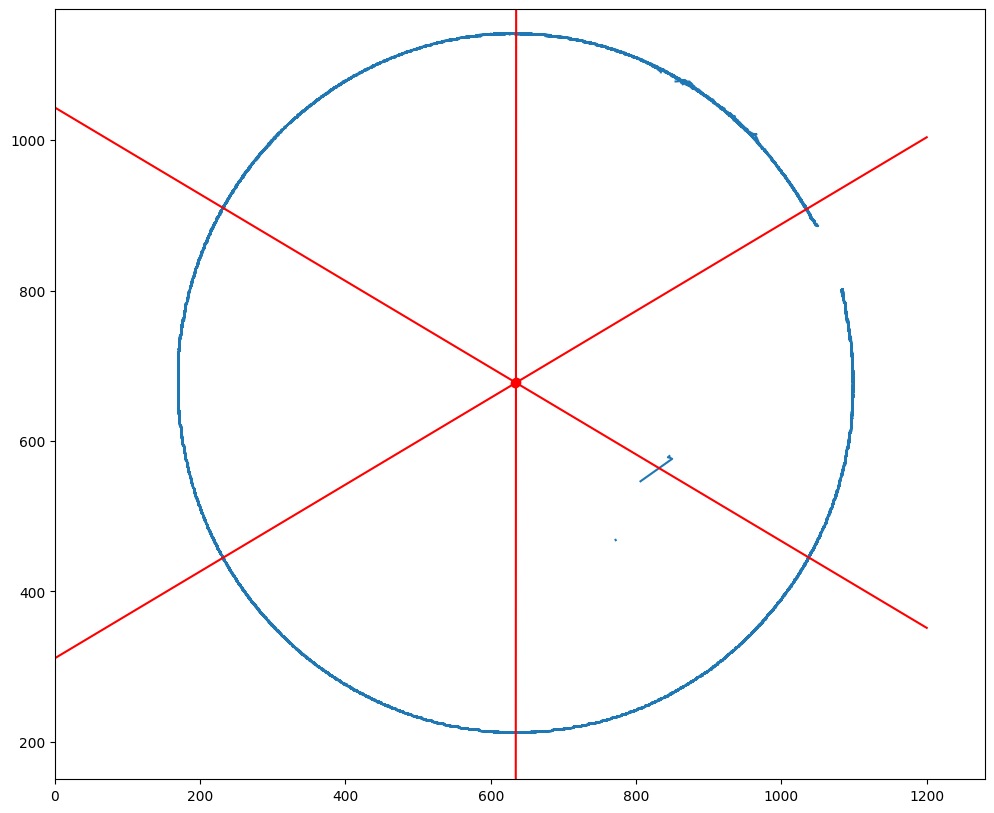

In [8]:
import matplotlib.pyplot as plt

locations.shape
plt.figure(figsize=(12,10))
# plot each body part
#for k in range(5):
	#
for k in [1]:
	loc = locations[:,k,:,0]
	
	# bp has dimensions: (90000,2)
	plt.plot(loc[:,0],
			 1200-loc[:,1],
			 )
			 
    


x = np.linspace(0, 1200, 100)

#original line equations 
y1 = -0.00 * x + 677.00
y2 = 1.73 * x + -421.12
y3 = -1.73 * x + 1775.12

#rotated line equations
y_test1 = 0.5773502691896384 * x + 310.9599293337763
y_test2 = 1948.7191084394267 * x + -1236078.708004072  # as close to x = 634 as possible 
y_test3 = -0.5766662617226573 * x + 1043.3574098868085

plt.plot(center_x, center_y, 'ro')
plt.plot(635, 678, 'ro')
#plt.plot(x, y1, 'black') 
#plt.plot(x, y2, 'black') 
#plt.plot(x, y3, 'black') 
plt.plot(x, y_test1, 'red') 
plt.plot(x, y_test2, 'red') 
plt.plot(x, y_test3, 'red') 


plt.gray()        
plt.xlim(0, 1280)
plt.ylim(150, 1174)
plt.show()



### Which point is in which sector?

In [142]:
#determine in which sector a point is 
#123456 clockwise, 1 is upper right sector

#this window is for experiments 

# center_x = 634.0 
# center_y = 677.0
# radius = 464.83426

x_m = 200
y_m = 800

print(x_m, y_m)

y1 = 0.5773502691896384 * x_m + 310.9599293337763
y2 = 1948.7191084394267 * x_m + -1236078.708004072  # as close to x = 634 as possible 
y3 = -0.5766662617226573 * x_m + 1043.3574098868085

if x_m >= 634:
    if y1 <= y_m:
        print(1)
    elif y3 <= y_m:
        print(2)
    else:
        print(3)
    
else:
    if y1 >= y_m:
        print(4)
    elif y3 >= y_m:
        print(5)
    else:
        print(6)

200 800
5


In [90]:
#two times first nan nan 

print(locations[1040, 1, 0, 0], locations[1040, 1, 1, 0])

print(locations[2545, 1, 0, 0], locations[2545, 1, 1, 0])


nan nan
nan nan


In [154]:

# Assuming 'locations' is a numpy array with shape (15044, 5, 2, 1)

sector1 = 0 
sector2 = 0 
sector3 = 0 
sector4 = 0 
sector5 = 0 
sector6 = 0

for i in range (0, 15044):
    x_m = locations[i, 1, 0, 0]
    y_m = 1200-locations[i, 1, 1, 0]

    y1 = 0.5773502691896384 * x_m + 310.9599293337763
    y2 = 1948.7191084394267 * x_m + -1236078.708004072  # as close to x = 634 as possible 
    y3 = -0.5766662617226573 * x_m + 1043.3574098868085


    if x_m >= 634:
        if y1 <= y_m:
            sector1 += 1
        elif y3 <= y_m:
            sector2 += 1 
        else:
            sector3 += 1
    
    elif x_m < 634:
        if y1 >= y_m:
            sector4 += 1
        elif y3 >= y_m:
            sector5 += 1
        else:
            sector6 += 1
            
    #print (sector1, sector2, sector3, sector4, sector5, sector6)
    #print (x_m, y_m)
    
print("Sector 1 = ", sector1)
print("Sector 2 =", sector2)
print("Sector 3 =", sector3)
print("Sector 4 =", sector4)
print("Sector 5 =", sector5)
print("Sector 6 =", sector6)

Sector 1 =  2522
Sector 2 = 2047
Sector 3 = 2473
Sector 4 = 2472
Sector 5 = 2525
Sector 6 = 2557


In [160]:

# Assuming 'locations' is a numpy array with shape (15044, 5, 2, 1)

sector1 = 0 
sector2 = 0 
sector3 = 0 
sector4 = 0 
sector5 = 0 
sector6 = 0

for i in range (0, 15044):
    x_m = locations[i, 1, 0, 0]
    y_m = 1200-locations[i, 1, 1, 0]

    y1 = 0.5773502691896384 * x_m + 310.9599293337763
    y2 = 1948.7191084394267 * x_m + -1236078.708004072  # as close to x = 634 as possible 
    x2 = (y_m + 1236078.708004072) / 1948.7191084394267
    y3 = -0.5766662617226573 * x_m + 1043.3574098868085


    if x_m >= 634:
        if y1 <= y_m:
            sector1 += 1
        elif y3 <= y_m:
            sector2 += 1 
        else:
            sector3 += 1
    
    elif x_m < 634:
        if y1 >= y_m:
            sector4 += 1
        elif y3 >= y_m:
            sector5 += 1
        else:
            sector6 += 1
            
    #print (sector1, sector2, sector3, sector4, sector5, sector6)
    #print (x_m, y_m)
    
print("Sector 1 = ", sector1)
print("Sector 2 =", sector2)
print("Sector 3 =", sector3)
print("Sector 4 =", sector4)
print("Sector 5 =", sector5)
print("Sector 6 =", sector6)

Sector 1 =  2522
Sector 2 = 2047
Sector 3 = 2473
Sector 4 = 2472
Sector 5 = 2525
Sector 6 = 2557


In [161]:
print(locations[8000,1,0,0], locations[8000,1,1,0])

print(locations[3000,1,0,0], locations[3000,1,1,0])

394.2929992675781 921.7932739257812
376.0995788574219 136.1969451904297


### Bar chart of the results

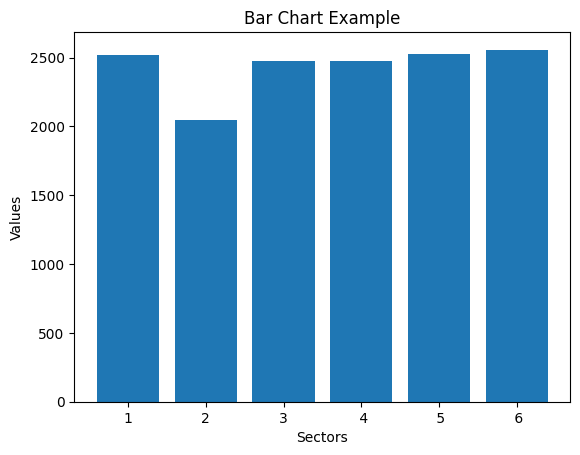

In [162]:
import matplotlib.pyplot as plt

# numbers for each sector are defined abvove

# Labels for the bars
labels = ['1', '2', '3', ' 4', ' 5', ' 6']

# Values for the bars
data = [sector1, sector2, sector3, sector4, sector5, sector6]

# Create a bar chart
plt.bar(labels, data)

# Add labels and title
plt.xlabel('Sectors')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Show the plot
plt.show()


## Comment

Still not perfect but good enough for now. Less frames for sector 2 detected due to thing hiding the cross. 
Sectors 1, 3, 4, 5, 6, probably not completly identical due to equations. Sectors 1 + 5 and 2 + 3 are almost identical. 